In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [4]:
df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
df['transaction_year_month'].max()

201711

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
c1=df[['exclusive_use_area','transaction_real_price']].sort_values(by=['transaction_real_price'], axis=0,ascending=False).head(30)
c1

,exclusive_use_area,transaction_real_price
23603,244.749,820000
21257,244.783,790000
1095683,244.783,780000
20395,244.783,770000
19270,244.749,770000
22286,244.749,760000
1096426,244.749,760000
19092,244.783,750000
20888,244.783,750000
1095989,243.642,727000


### 평수가 넓을수록 비쌈

In [8]:
df['year_of_completion'].min()

1961

In [9]:
df['year_of_completion'].max()

2017

In [10]:
len(df['year_of_completion'].value_counts())

55

In [11]:
c2=df[['year_of_completion','transaction_real_price']].sort_values(by=['transaction_real_price'], axis=0,ascending=False).head(30)
c2

,year_of_completion,transaction_real_price
23603,2011,820000
21257,2011,790000
1095683,2011,780000
20395,2011,770000
19270,2011,770000
22286,2011,760000
1096426,2011,760000
19092,2011,750000
20888,2011,750000
1095989,2011,727000


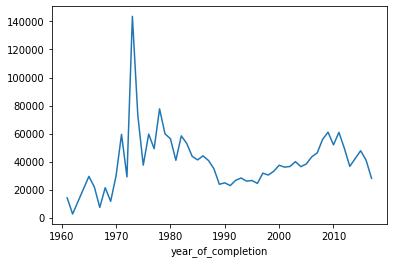

In [12]:
df.groupby(["year_of_completion"])["transaction_real_price"].mean().plot()

### 이상치확인

In [45]:
dff=df.loc[(df['year_of_completion']<1980) &(df['year_of_completion']>1970) ]
dff

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
32,32,7095,서울특별시,숭인동,204-11,숭인상가,숭인동 204-11 숭인상가,80.85,1979,200801,21~31,7,32500
148,148,7095,서울특별시,숭인동,204-11,숭인상가,숭인동 204-11 숭인상가,78.75,1979,200803,11~20,7,34000
153,153,2503,서울특별시,행촌동,41-1,대성맨션,행촌동 41-1 대성맨션,19.27,1971,200803,11~20,2,4500
154,154,2503,서울특별시,행촌동,41-1,대성맨션,행촌동 41-1 대성맨션,30.28,1971,200803,21~31,5,7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212839,1230764,4361,부산광역시,모라동,648-1,모라맨션,모라동 648-1 모라맨션,70.84,1978,201701,21~31,1,11000
1212884,1230810,5112,부산광역시,주례동,692-36,본동맨션,주례동 692-36 본동맨션,52.89,1978,201701,1~10,2,8000
1213388,1231317,9837,부산광역시,주례동,152-20,주례,주례동 152-20 주례,50.45,1975,201703,21~31,5,9300
1213744,1231675,4361,부산광역시,모라동,648-1,모라맨션,모라동 648-1 모라맨션,67.44,1978,201705,21~31,5,10000


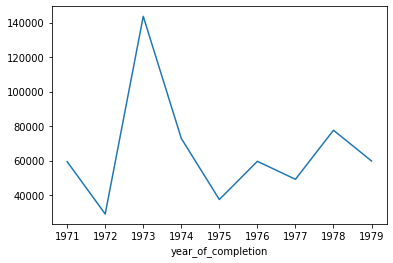

In [43]:
dff.groupby(["year_of_completion"])["transaction_real_price"].mean().plot()

In [48]:
dff.loc[(dff['transaction_real_price']>100000)& (dff['year_of_completion']==1973)].sort_values(by='transaction_real_price',ascending=False)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1164016,1173684,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,140.13,1973,201707,21~31,1,353000
1163979,1173646,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,140.13,1973,201707,11~20,5,343400
1163416,1173016,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,140.13,1973,201706,1~10,5,330000
1163438,1173042,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,140.13,1973,201706,1~10,4,325000
1162245,1171771,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,140.13,1973,201704,21~30,2,310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19911,19911,10648,서울특별시,이촌동,302-28,타워,이촌동 302-28 타워,202.45,1973,201505,1~10,10,108000
494205,494205,4695,서울특별시,반포동,757,반포 주공1단지,반포동 757 반포 주공1단지,106.25,1973,200902,1~10,3,105000
18806,18806,10648,서울특별시,이촌동,302-28,타워,이촌동 302-28 타워,202.45,1973,201411,1~10,12,105000
16278,16278,10648,서울특별시,이촌동,302-28,타워,이촌동 302-28 타워,202.45,1973,201208,21~31,6,105000


### 1973년에 완공된 반포주공1단지가 굉장히 비싸기때문에 그래프로봣을때 많이 튀어나온것을 확인할수있다.

In [31]:
df['transaction_year_month'].unique()

array([200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
      

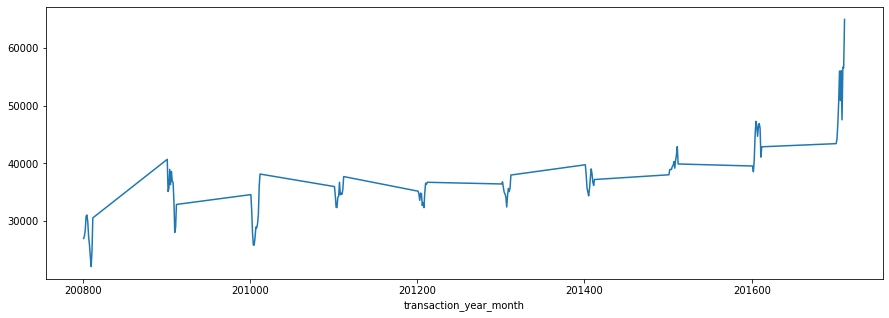

In [32]:
plt.figure(figsize=(15,5))
df.groupby(["transaction_year_month"])["transaction_real_price"].mean().plot()

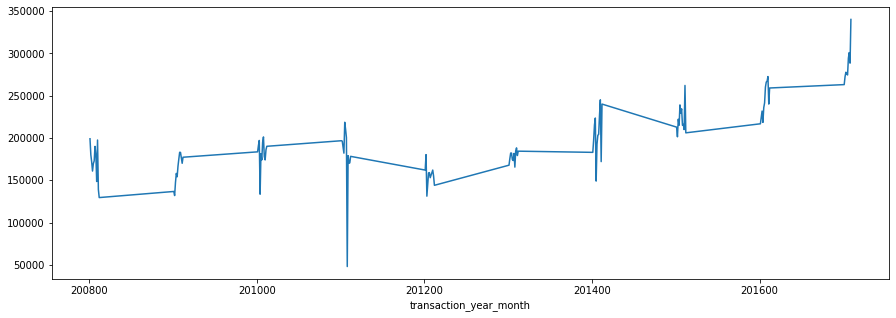

In [58]:
plt.figure(figsize=(15,5))
apt_ex=df.loc[df['apt']=='반포 주공1단지']
apt_ex.groupby(["transaction_year_month"])["transaction_real_price"].mean().plot()

### 반포주공1단지를 예를들었을떄 같은 아파트여도 계약날짜가 날이갈수록 비싸지는 것을 알수있다.

In [15]:
df['floor'].value_counts()

 5     88676
 4     88399
 3     85549
 2     82589
 1     74927
       ...  
 78        4
 80        4
-4         4
 76        3
 79        2
Name: floor, Length: 84, dtype: int64

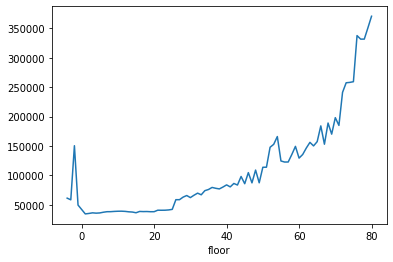

In [16]:
df.groupby(["floor"])["transaction_real_price"].mean().plot()

In [17]:
df.loc[df['floor']<0].sort_values(by=['transaction_real_price'], axis=0,ascending=False).head(30)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
21343,21343,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201602,1~10,-2,624000
23386,23386,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.305,2011,201610,21~31,-2,620000
23376,23376,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201610,11~20,-1,575000
23147,23147,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.305,2011,201609,21~30,-2,558000
23585,23585,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201612,1~10,-1,543000
1095416,1095752,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,490000
1095417,1095753,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,480000
537384,537384,10310,서울특별시,청담동,102-13,청담파라곤Ⅱ 2단지,청담동 102-13 청담파라곤Ⅱ 2단지,241.880,2010,201012,11~20,-1,290000
542431,542431,10309,서울특별시,청담동,102-1,청담파라곤Ⅱ 1단지,청담동 102-1 청담파라곤Ⅱ 1단지,217.200,2010,201204,21~30,-1,216000
12963,12963,2006,서울특별시,동빙고동,310-10,노블캐슬,동빙고동 310-10 노블캐슬,165.680,2008,200810,1~10,-1,155000


In [18]:
df.groupby(["city"])["transaction_real_price"].mean()

city
부산광역시    21102.045856
서울특별시    49169.779317
Name: transaction_real_price, dtype: float64

### 부산,서울 0,1로 맵핑

In [19]:
seolul_apt=df.loc[df['city']=='서울특별시']
seolul_apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 1184018
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          742285 non-null  int64  
 1   apartment_id            742285 non-null  int64  
 2   city                    742285 non-null  object 
 3   dong                    742285 non-null  object 
 4   jibun                   742285 non-null  object 
 5   apt                     742285 non-null  object 
 6   addr_kr                 742285 non-null  object 
 7   exclusive_use_area      742285 non-null  float64
 8   year_of_completion      742285 non-null  int64  
 9   transaction_year_month  742285 non-null  int64  
 10  transaction_date        742285 non-null  object 
 11  floor                   742285 non-null  int64  
 12  transaction_real_price  742285 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 79.3+ MB


In [20]:
busan_apt=df.loc[df['city']=='부산광역시']
busan_apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474268 entries, 650921 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          474268 non-null  int64  
 1   apartment_id            474268 non-null  int64  
 2   city                    474268 non-null  object 
 3   dong                    474268 non-null  object 
 4   jibun                   474268 non-null  object 
 5   apt                     474268 non-null  object 
 6   addr_kr                 474268 non-null  object 
 7   exclusive_use_area      474268 non-null  float64
 8   year_of_completion      474268 non-null  int64  
 9   transaction_year_month  474268 non-null  int64  
 10  transaction_date        474268 non-null  object 
 11  floor                   474268 non-null  int64  
 12  transaction_real_price  474268 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 50.7+ MB


In [21]:
df.groupby(['city',"dong"])["transaction_real_price"].mean().sort_values(ascending=False)

city   dong   
서울특별시  장충동1가      269888.888889
       압구정동       164534.722914
       청암동        161403.700000
       용산동5가      153497.331633
       회현동2가      139906.140351
                      ...      
부산광역시  중앙동4가        6312.500000
       봉래동5가        5732.546012
       신창동2가        5531.250000
       장안읍 명례리      5508.333333
       신선동3가        5500.000000
Name: transaction_real_price, Length: 477, dtype: float64

### 동별로 라벨링이 필요하다

In [74]:
apt_number=df.groupby(['apt'],as_index=False)['apartment_id'].count()
apt_number['apartment_id']

0        1
1        4
2        4
3        1
4        1
        ..
10435    9
10436    8
10437    6
10438    1
10439    8
Name: apartment_id, Length: 10440, dtype: int64

In [85]:
apt_number.loc[apt_number['apartment_id']<3]

,apt,apartment_id
0,(1-10),1
3,(101-0),1
4,(102-0),1
8,(1159-181),1
15,(1546-0),1
...,...,...
10405,흥화빌라트,1
10412,희종오션뷰,2
10417,힐데스하임,1
10425,힐캐슬,2


### 아파트별로 라벨링이 필요하다(아파트 한개인것들을 같은 라벨로 할지 고민)

In [22]:
park=pd.read_csv('park.csv')
park.head(5)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [23]:
park['city'].value_counts()

서울특별시    930
부산광역시    429
Name: city, dtype: int64

In [24]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [25]:
center=pd.read_csv('day_care_center.csv')
center.head(5)

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [26]:
center['day_care_type'].unique()

array(['국공립', '직장', '가정', '민간', '법인·단체', '협동', '사회복지법인'], dtype=object)

In [27]:
center.groupby(by='day_care_type',).count()

,city,gu,day_care_name,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
day_care_type,,,,,,,,,,
가정,3120,3120,3120,3120,3052,1818,1493,2257,2948,3120
국공립,1408,1408,1408,1408,1348,796,697,992,1288,1408
민간,2492,2492,2492,2492,2424,1407,1161,1655,2325,2492
법인·단체,113,113,113,113,113,79,63,88,111,113
사회복지법인,107,107,107,107,107,68,58,71,106,107
직장,272,272,272,272,244,157,135,187,239,272
협동,39,39,39,39,38,27,19,30,38,39


### 가설1: 공원과 가까울수록 아파트가가 높을것이다.
### 가설2:어린이집과 가까울수록 아파트가가 높을것이다.